# 01PAO25-25 - Python, Data Types

![Instituto Superior Tecnológico Quito](Recurso-26.png)

**Nombre:** Germán Del Río  
**Fecha:** 21/07/2055  

---

![Python Logo](python_logo.png)

[-- Enlace al Repositorio](https://github.com/Saquis/MachineLearning/tree/main/Deberes )

# Regresión Lineal: Coste de un incidente de seguridad

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

In [2]:
# Instalacion de librerías externas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

### 1. Generación del conjunto de datos

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


In [5]:
### 2. Visualización del conjunto de datos

La longitud del conjunto de datos es: 100

Estadísticas del conjunto de datos:
X - Media: 0.94, Desviación estándar: 0.49
y - Media: 6.86, Desviación estándar: 1.86
Rango de X: [0.02, 1.95]
Rango de y: [1.94, 10.97]


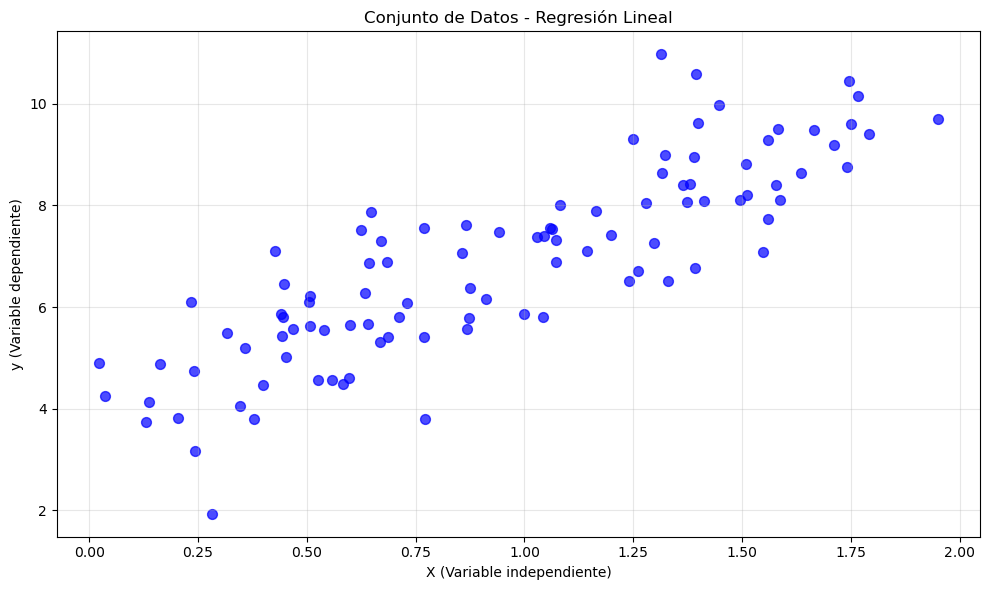

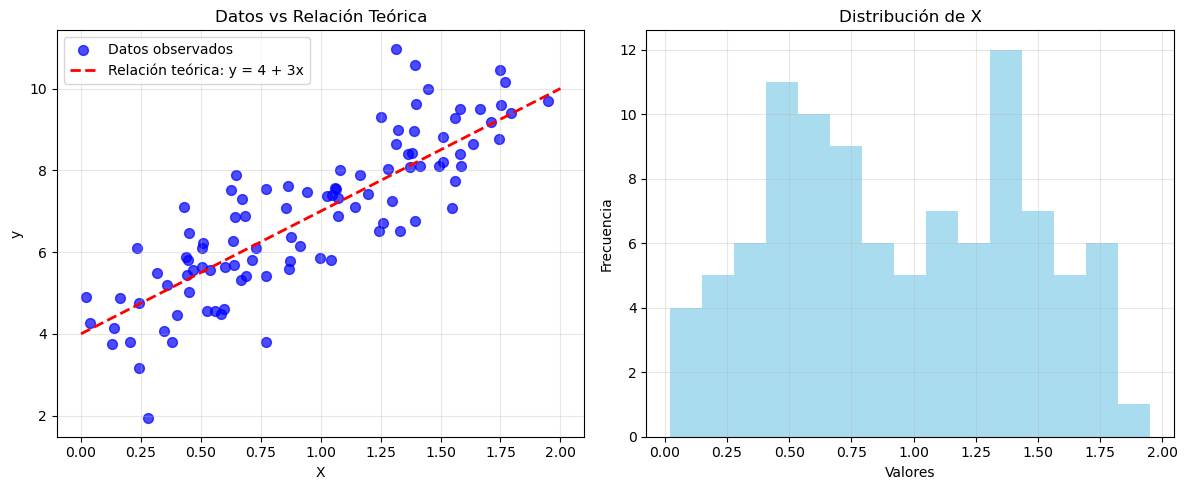

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generar el conjunto de datos
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
print("La longitud del conjunto de datos es:", len(X))

# Visualización del conjunto de datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, color='blue', s=50)
plt.xlabel('X (Variable independiente)')
plt.ylabel('y (Variable dependiente)')
plt.title('Conjunto de Datos - Regresión Lineal')
plt.grid(True, alpha=0.3)

# Mostrar estadísticas básicas
print(f"\nEstadísticas del conjunto de datos:")
print(f"X - Media: {X.mean():.2f}, Desviación estándar: {X.std():.2f}")
print(f"y - Media: {y.mean():.2f}, Desviación estándar: {y.std():.2f}")
print(f"Rango de X: [{X.min():.2f}, {X.max():.2f}]")
print(f"Rango de y: [{y.min():.2f}, {y.max():.2f}]")

plt.tight_layout()
plt.show()

# Visualización adicional con información de la relación
plt.figure(figsize=(12, 5))

# Subplot 1: Scatter plot con línea teórica
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.7, color='blue', s=50, label='Datos observados')

# Línea teórica (sin ruido): y = 4 + 3*X
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_theoretical = 4 + 3 * X_line
plt.plot(X_line, y_theoretical, 'r--', linewidth=2, label='Relación teórica: y = 4 + 3x')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos vs Relación Teórica')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Histogramas
plt.subplot(1, 2, 2)
plt.hist(X.flatten(), bins=15, alpha=0.7, color='skyblue', label='Distribución de X')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de X')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3. Modificación del conjunto de datos

=== MODIFICACIONES DEL CONJUNTO DE DATOS ===

1. Agregando columna de sesgo (intercepto):
   Forma original de X: (100, 1)
   Forma con sesgo: (100, 2)
   Primeras 5 filas con sesgo:
[[1.         0.4199079 ]
 [1.         0.47542762]
 [1.         1.93902872]
 [1.         0.0886475 ]
 [1.         1.0188844 ]]

2. Estandarización y Normalización:
   X original - Media: 0.946, Std: 0.601
   X estandarizado - Media: -0.000, Std: 1.000
   X normalizado - Min: 0.000, Max: 1.000

3. División en conjuntos de entrenamiento y prueba:
   Conjunto completo: 100 muestras
   Entrenamiento: 80 muestras
   Prueba: 20 muestras

4. Características polinómicas (grado 2):
   Forma original: (100, 1)
   Forma polinómica: (100, 2)
   Nombres de características: ['x' 'x^2']
   Primeras 5 filas:
[[0.4199079  0.17632265]
 [0.47542762 0.22603142]
 [1.93902872 3.75983237]
 [0.0886475  0.00785838]
 [1.0188844  1.03812543]]

5. Conjunto con ruido adicional:
   Factor de ruido aplicado: 0.5
   Std original de X: 0.6

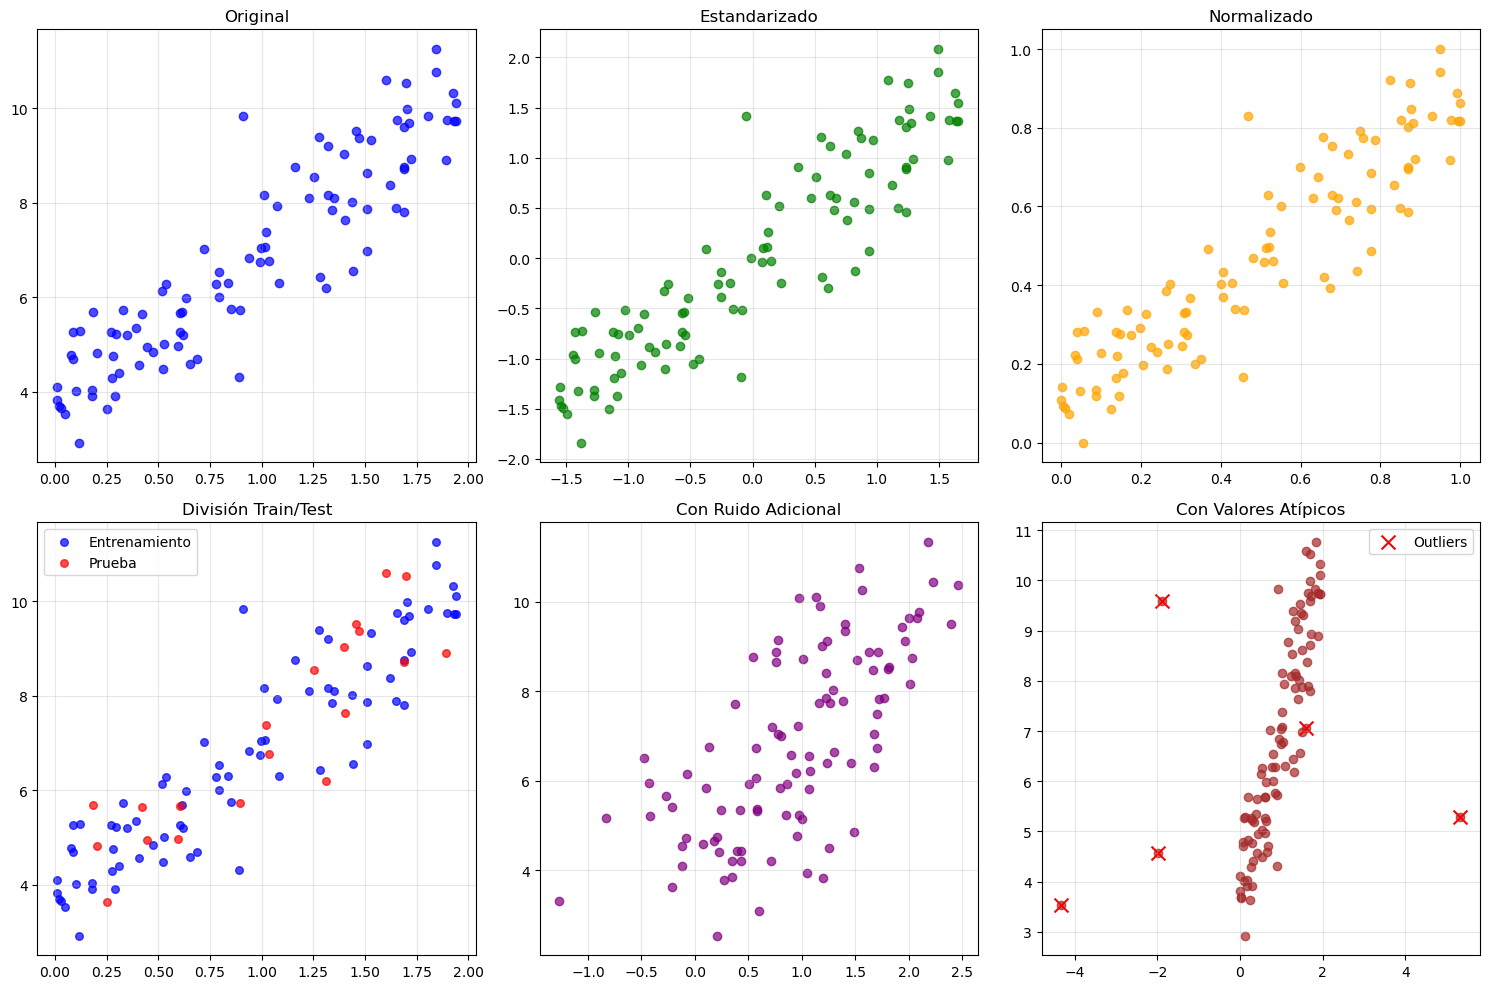

=== CONJUNTOS DISPONIBLES PARA ANÁLISIS ===
- X_original, y_original: Datos originales
- X_with_bias: Con columna de intercepto
- X_standardized, y_standardized: Estandarizados
- X_normalized, y_normalized: Normalizados
- X_train, X_test, y_train, y_test: División train/test
- X_poly: Con características polinómicas
- X_noisy, y_noisy: Con ruido adicional
- X_outliers, y_outliers: Con valores atípicos


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de datos original
X_original = 2 * np.random.rand(100, 1)
y_original = 4 + 3 * X_original + np.random.randn(100, 1)

print("=== MODIFICACIONES DEL CONJUNTO DE DATOS ===\n")

# 1. Agregar sesgo/intercepto (columna de unos)
X_with_bias = np.c_[np.ones((100, 1)), X_original]  # Agregar columna de 1s
print("1. Agregando columna de sesgo (intercepto):")
print(f"   Forma original de X: {X_original.shape}")
print(f"   Forma con sesgo: {X_with_bias.shape}")
print(f"   Primeras 5 filas con sesgo:\n{X_with_bias[:5]}\n")

# 2. Normalización/Estandarización
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Estandarización (media=0, std=1)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X_original)
y_standardized = scaler_standard.fit_transform(y_original)

# Normalización (rango 0-1)
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X_original)
y_normalized = scaler_minmax.fit_transform(y_original)

print("2. Estandarización y Normalización:")
print(f"   X original - Media: {X_original.mean():.3f}, Std: {X_original.std():.3f}")
print(f"   X estandarizado - Media: {X_standardized.mean():.3f}, Std: {X_standardized.std():.3f}")
print(f"   X normalizado - Min: {X_normalized.min():.3f}, Max: {X_normalized.max():.3f}\n")

# 3. División en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

print("3. División en conjuntos de entrenamiento y prueba:")
print(f"   Conjunto completo: {len(X_original)} muestras")
print(f"   Entrenamiento: {len(X_train)} muestras")
print(f"   Prueba: {len(X_test)} muestras\n")

# 4. Agregar características polinómicas
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_original)

print("4. Características polinómicas (grado 2):")
print(f"   Forma original: {X_original.shape}")
print(f"   Forma polinómica: {X_poly.shape}")
print(f"   Nombres de características: {poly_features.get_feature_names_out(['x'])}")
print(f"   Primeras 5 filas:\n{X_poly[:5]}\n")

# 5. Agregar ruido adicional
noise_factor = 0.5
X_noisy = X_original + noise_factor * np.random.randn(100, 1)
y_noisy = y_original + noise_factor * np.random.randn(100, 1)

print("5. Conjunto con ruido adicional:")
print(f"   Factor de ruido aplicado: {noise_factor}")
print(f"   Std original de X: {X_original.std():.3f}")
print(f"   Std con ruido de X: {X_noisy.std():.3f}\n")

# 6. Agregar valores atípicos (outliers)
X_outliers = X_original.copy()
y_outliers = y_original.copy()

# Agregar algunos outliers
outlier_indices = np.random.choice(100, 5, replace=False)
X_outliers[outlier_indices] = X_outliers[outlier_indices] + 3 * np.random.randn(5, 1)
y_outliers[outlier_indices] = y_outliers[outlier_indices] + 5 * np.random.randn(5, 1)

print("6. Conjunto con valores atípicos:")
print(f"   Se agregaron {len(outlier_indices)} outliers en posiciones: {outlier_indices}\n")

# Visualización de las modificaciones
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original
axes[0,0].scatter(X_original, y_original, alpha=0.7, color='blue')
axes[0,0].set_title('Original')
axes[0,0].grid(True, alpha=0.3)

# Estandarizado
axes[0,1].scatter(X_standardized, y_standardized, alpha=0.7, color='green')
axes[0,1].set_title('Estandarizado')
axes[0,1].grid(True, alpha=0.3)

# Normalizado
axes[0,2].scatter(X_normalized, y_normalized, alpha=0.7, color='orange')
axes[0,2].set_title('Normalizado')
axes[0,2].grid(True, alpha=0.3)

# Entrenamiento vs Prueba
axes[1,0].scatter(X_train, y_train, alpha=0.7, color='blue', label='Entrenamiento', s=30)
axes[1,0].scatter(X_test, y_test, alpha=0.7, color='red', label='Prueba', s=30)
axes[1,0].set_title('División Train/Test')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Con ruido
axes[1,1].scatter(X_noisy, y_noisy, alpha=0.7, color='purple')
axes[1,1].set_title('Con Ruido Adicional')
axes[1,1].grid(True, alpha=0.3)

# Con outliers
axes[1,2].scatter(X_outliers, y_outliers, alpha=0.7, color='brown')
axes[1,2].scatter(X_outliers[outlier_indices], y_outliers[outlier_indices], 
                 color='red', s=100, marker='x', label='Outliers')
axes[1,2].set_title('Con Valores Atípicos')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Guardar los conjuntos modificados para uso posterior
print("=== CONJUNTOS DISPONIBLES PARA ANÁLISIS ===")
print("- X_original, y_original: Datos originales")
print("- X_with_bias: Con columna de intercepto")
print("- X_standardized, y_standardized: Estandarizados")
print("- X_normalized, y_normalized: Normalizados")
print("- X_train, X_test, y_train, y_test: División train/test")
print("- X_poly: Con características polinómicas")
print("- X_noisy, y_noisy: Con ruido adicional")
print("- X_outliers, y_outliers: Con valores atípicos")

### 4. Construcción del modelo

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Usando los datos del paso anterior
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Parámetros del modelo
print("Parámetros del modelo:")
print(f"Intercepto: {model.intercept_[0]:.3f}")
print(f"Coeficiente: {model.coef_[0][0]:.3f}")
print(f"Ecuación: y = {model.intercept_[0]:.3f} + {model.coef_[0][0]:.3f}*x")

Parámetros del modelo:
Intercepto: 3.991
Coeficiente: 3.062
Ecuación: y = 3.991 + 3.062*x


### 5. Predicción de nuevos ejemplos

Predicciones para nuevos ejemplos:
X = 0.5 → y = 5.523
X = 1.0 → y = 7.054
X = 1.5 → y = 8.585
X = 2.0 → y = 10.116


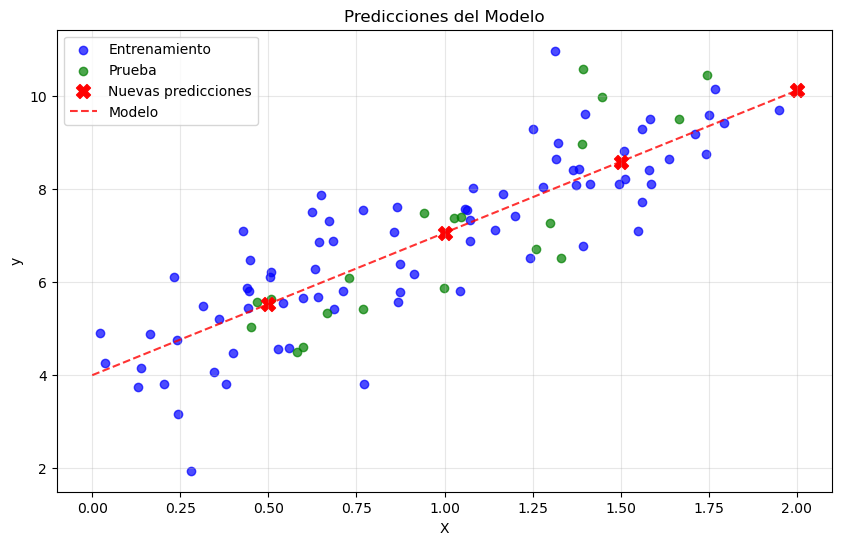

In [10]:
# Nuevos datos para predecir
X_new = np.array([[0.5], [1.0], [1.5], [2.0]])

# Predicciones
y_new_pred = model.predict(X_new)

print("Predicciones para nuevos ejemplos:")
for i in range(len(X_new)):
    print(f"X = {X_new[i][0]:.1f} → y = {y_new_pred[i][0]:.3f}")

# Visualizar predicciones
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.7, color='blue', label='Entrenamiento')
plt.scatter(X_test, y_test, alpha=0.7, color='green', label='Prueba')
plt.scatter(X_new, y_new_pred, color='red', s=100, marker='X', label='Nuevas predicciones')

# Línea de regresión
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, 'r--', alpha=0.8, label='Modelo')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Predicciones del Modelo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()